**In this task, you'll delve into the realm of real estate data analysis. Your goal will be to develop a predictive model that can accurately forecast house prices based on various factors. This project will involve data collection, preprocessing, feature engineering, model selection, and evaluation.**

**Data Collection**

In [1]:
import numpy as np 
import pandas as pd 

In [50]:
dataset = pd.read_csv('Housing.csv')

In [51]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
dataset.shape

(545, 13)

**Feature Engineering**

<Axes: xlabel='area', ylabel='price'>

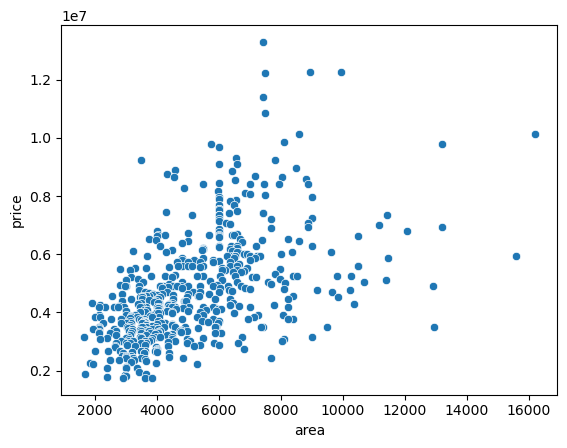

In [15]:
import seaborn as sns
sns.scatterplot(dataset, x='area', y='price')

In [25]:
low_P,high_P = dataset['price'].quantile([0.05,0.95])
low_A,high_A = dataset['area'].quantile([0.05,0.95])

In [26]:
dataset_without_outliers = dataset[dataset['price'].between(low_P,high_P) 
                                   & dataset['area'].between(low_A,high_A)]

In [18]:
dataset_without_outliers.shape

(450, 13)

<Axes: xlabel='area', ylabel='price'>

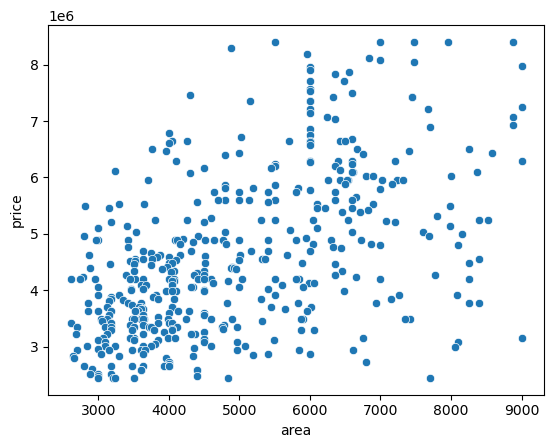

In [19]:
sns.scatterplot(dataset_without_outliers, x='area', y='price')

In [27]:
X1 = dataset_without_outliers.drop('price', axis=1)
y1 = dataset_without_outliers['price']

In [21]:
X.shape

(450, 12)

In [22]:
y.shape

(450,)

# Using Label Encoding

**Preprocessing**

In [23]:
cols_with_missing = [col 
                     for col in X.columns
                       if X[col].isnull().any()]
print(cols_with_missing)

[]


In [24]:
def contains_strings(column):
    return any(isinstance(value, str) for value in column)

In [25]:
columns_with_strings = [column for column in X.columns if contains_strings(X[column])]

string = []

if columns_with_strings:
    for column in columns_with_strings:
        string.append(column)
    print(string)
else:
    print("No columns contain string values.")

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [26]:
from sklearn.preprocessing import LabelEncoder

for col in string:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

In [27]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8875,3,1,1,1,0,0,0,0,1,0,1
28,7950,5,2,2,1,0,1,1,0,2,0,2
29,5500,4,2,2,1,0,1,0,1,1,1,1
30,7475,3,2,4,1,0,0,0,1,2,0,2
31,7000,3,1,4,1,0,0,0,1,2,0,1


In [28]:
X['furnishingstatus'].unique()

array([1, 2, 0])

In [29]:
X.shape

(450, 12)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler  

st = StandardScaler()  
X_train = st.fit_transform(X_train)  
X_test= st.transform(X_test)  

**Model Selection and Evaluation**

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    R2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, R2

In [57]:
results = {}

for name, model in models.items():
    mae, mse, rmse, R2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': R2}

In [58]:
for model, metrics in results.items():
    print(f"Model: {model}")
    
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

Model: Linear Regression
  MAE: 633508.8905311298
  MSE: 724187614146.0371
  RMSE: 850992.1351845956
  R2 Score: 0.643409902602025
Model: Random Forest
  MAE: 610933.9544444444
  MSE: 710723723518.8639
  RMSE: 843044.3188343445
  R2 Score: 0.6500395245070625
Model: Gradient Boosting
  MAE: 612499.2766531454
  MSE: 755347915550.0776
  RMSE: 869107.5396923431
  R2 Score: 0.6280665651911529


In [82]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

RandomForestRegressor()

In [83]:
y_pred = best_model.predict(X_test)

In [84]:
mae = mean_absolute_error(y_test, y_pred)
mae

632193.6781481481

In [85]:
mse = mean_squared_error(y_test, y_pred)
mse

775919312886.0731

In [86]:
rmse = np.sqrt(mse)
rmse

880862.8229673865

In [87]:
R2 = r2_score(y_test, y_pred)
R2

0.6179372058423256

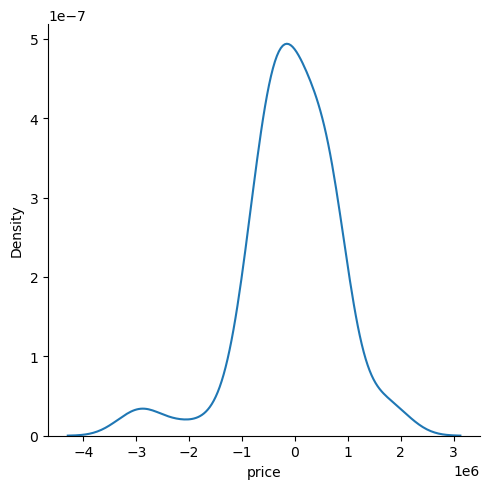

In [88]:
import seaborn as sns

sns.displot(y_pred - y_test, kind='kde')

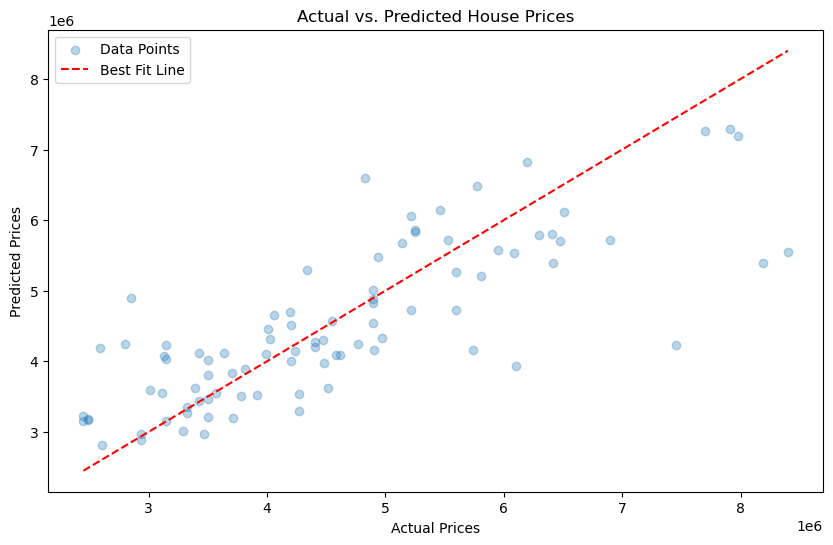

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')

plt.legend(['Data Points', 'Best Fit Line'], loc='upper left')
plt.show()

# Using One Hot Encoding

In [45]:
X = dataset.copy()

In [46]:
X.dropna(axis=0, subset=['price'], inplace=True)
y = X.price
X.drop(['price'], axis=1, inplace=True)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    test_size=0.2,
                                                    random_state=0)

In [48]:
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [49]:
numerical_features = X.select_dtypes(exclude=['object']).columns
numerical_features

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [52]:
my_cols = categorical_cols + numerical_cols

X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

In [17]:
X_train.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,area,bedrooms,bathrooms,stories,parking
542,yes,no,no,no,no,no,unfurnished,3620,2,1,1,0
496,yes,no,no,no,no,no,unfurnished,4000,2,1,1,0
484,no,no,no,no,no,no,unfurnished,3040,2,1,1,0
507,yes,no,no,no,no,no,unfurnished,3600,2,1,1,0
252,yes,no,no,no,no,no,semi-furnished,9860,3,1,1,0


In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',
                              fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

In [54]:
preprocessor = ColumnTransformer(
     transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', categorical_transformer, categorical_features)  
    ])

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [56]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return mae, mse, rmse

In [60]:
results = {}

for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
    mae, mse, rmse = evaluate_model(clf, X_train, X_test, y_train, y_test)
    
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

In [61]:
for model, metrics in results.items():
    print(f"Model: {model}")
    
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

Model: Linear Regression
  MAE: 716231.1189748815
  MSE: 976484771024.6135
  RMSE: 988172.4399236266
Model: Random Forest
  MAE: 795210.1721712538
  MSE: 1228645266828.853
  RMSE: 1108442.721492118
Model: Gradient Boosting
  MAE: 824330.5755887085
  MSE: 1197996142421.512
  RMSE: 1094530.101194806


In [62]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [10, 20, 30, None]
}

In [63]:
best_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestRegressor())])

In [64]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(best_model, param_grid, cv=5, 
                           n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, 30, None],
                         'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'classifier__n_estimators': [50, 100, 200]},
             verbose=2)

In [66]:
print(f"Best parameters found: {grid_search.best_params_}")

Best parameters found: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 50}


In [67]:
print(f"Best cross-validation score: {grid_search.best_score_}")

Best cross-validation score: 0.6262522498668044


In [68]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [70]:
mae = mean_absolute_error(y_test, y_pred)
mae

722088.866055046

In [71]:
mse = mean_squared_error(y_test, y_pred)
mse

1022034336551.2976

In [72]:
rmse = np.sqrt(mse)
rmse

1010957.1388299791

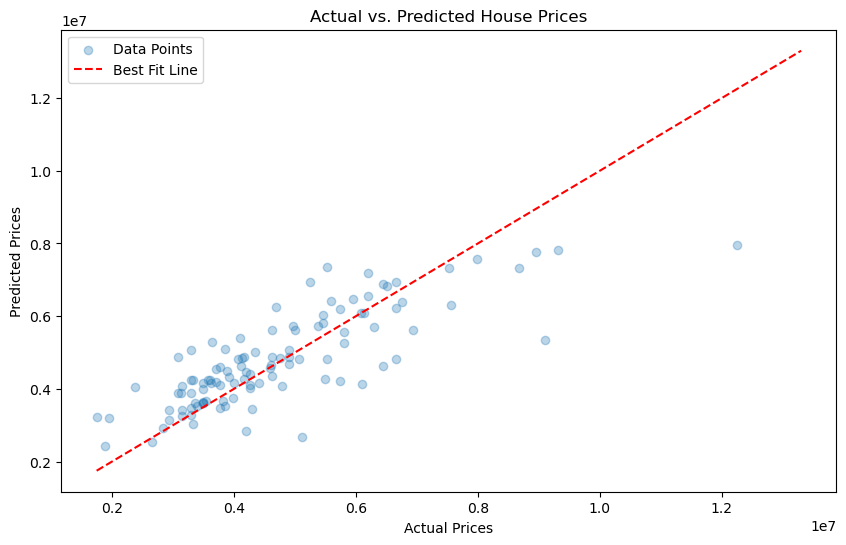

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')

plt.legend(['Data Points', 'Best Fit Line'], loc='upper left')
plt.show()